**Customer Segmentation using K-Means Clustering and Parameter Tuning**

**Table of Contents:**

•	Introduction

*   Project Overview	
*   Problem Statement and Objective
*  Model Development and Evaluation

•	Data Modeling

*	Import Packages

•	Segmentation

*	Data
*	Optimal number of clusters
*	Parameter Grid
*	K-Means
*	Hierarchical Clustering



**Introduction:**

The purpose of this dataset is to help us understand customer behavior and purchasing data in a supermarket mall through membership cards. The data includes basic information about customers such as their ID, age, gender, annual income, and spending score. Spending score is a parameter assigned to customers based on their purchasing behaviour. The goal of this dataset is to use unsupervised ML techniques, specifically K-Means clustering algorithm, to segment the customers into groups and identify the target customers who are likely to converge. By understanding the customers better, the mall can plan their marketing strategy accordingly and increase their revenue. This dataset is designed for learning purposes and serves as an excellent example of how to use unsupervised machine learning algorithms in practice.

**Project Overview:**

The aim of this project is to segment customers of a mall. I am using K-means clustering algorithm to cluster customers based on their features such as age, gender, annual income, and spending score.

**Problem Statement and Objective:**

The mall wants to understand the customer segments to better target marketing efforts and improve sales. The objective of this project is to identify distinct customer segments and provide recommendations to the marketing team to develop targeted marketing strategies.

**Model Development and Evaluation:**

K-means clustering algorithm was used to develop the model. The optimal number of clusters was selected using the elbow method and silhouette score. The model was evaluated using within-cluster sum of squares (WCSS) and silhouette score.


**Data Modeling**
* **Import Packages**

In [ ]:
pip install gap-stat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from scipy import stats
import statistics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from gap_statistic import OptimalK

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

plt.rcParams["figure.figsize"] = [16, 8]

width = 900
height = 600

bg_color = '#FFFFFF'
paper_bg = '#FFFFFF'

plt.rcParams.update({'font.size': 18})
color_charts = '#2baae2'
plt.style.use('ggplot')
color = '#16171f'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color

plt.rcParams.update({'text.color' : color,'axes.labelcolor' : color})

plt.rcParams.update({'font.size': 17})
plt.rc('font', size=17)


#Default theme
sns.set_theme(palette='tab10',rc=None)

%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

•	**Segmentation**

*	**Data**

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


*	**Optimal number of clusters**

In [ ]:
X = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

# Cast the data to float if necessary
X = X.astype(float)

# Determine optimal number of clusters using gap statistic
n_clusters = OptimalK(n_jobs=-1)
n_clusters(X, cluster_array=np.arange(1, 7))

# Get the optimal number of clusters
n_clusters_g = n_clusters.n_clusters

print(f'Optimal number of clusters based on gap statistic: {n_clusters_g}')

Optimal number of clusters based on gap statistic: 5


In [ ]:
# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# fit the data
dbscan.fit(X_scaled)

# get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# print the results
print('Number of clusters:', n_clusters)

Number of clusters: 6


*	**Parameter Grid**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_clusters': range(2, n_clusters_g + 1),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'auto', 'init': 'random', 'max_iter': 100, 'n_clusters': 5, 'n_init': 10, 'random_state': 0, 'tol': 0.0001}
Optimal number of clusters based on parameter grid: 5


*	**K-Means**

For n_clusters = 2, the average silhouette score is : 0.29
For n_clusters = 3, the average silhouette score is : 0.38
For n_clusters = 4, the average silhouette score is : 0.41
For n_clusters = 5, the average silhouette score is : 0.44
For n_clusters = 6, the average silhouette score is : 0.45
For n_clusters = 7, the average silhouette score is : 0.44
For n_clusters = 8, the average silhouette score is : 0.43
For n_clusters = 9, the average silhouette score is : 0.39
For n_clusters = 10, the average silhouette score is : 0.39


Text(0, 0.5, 'WCSS')

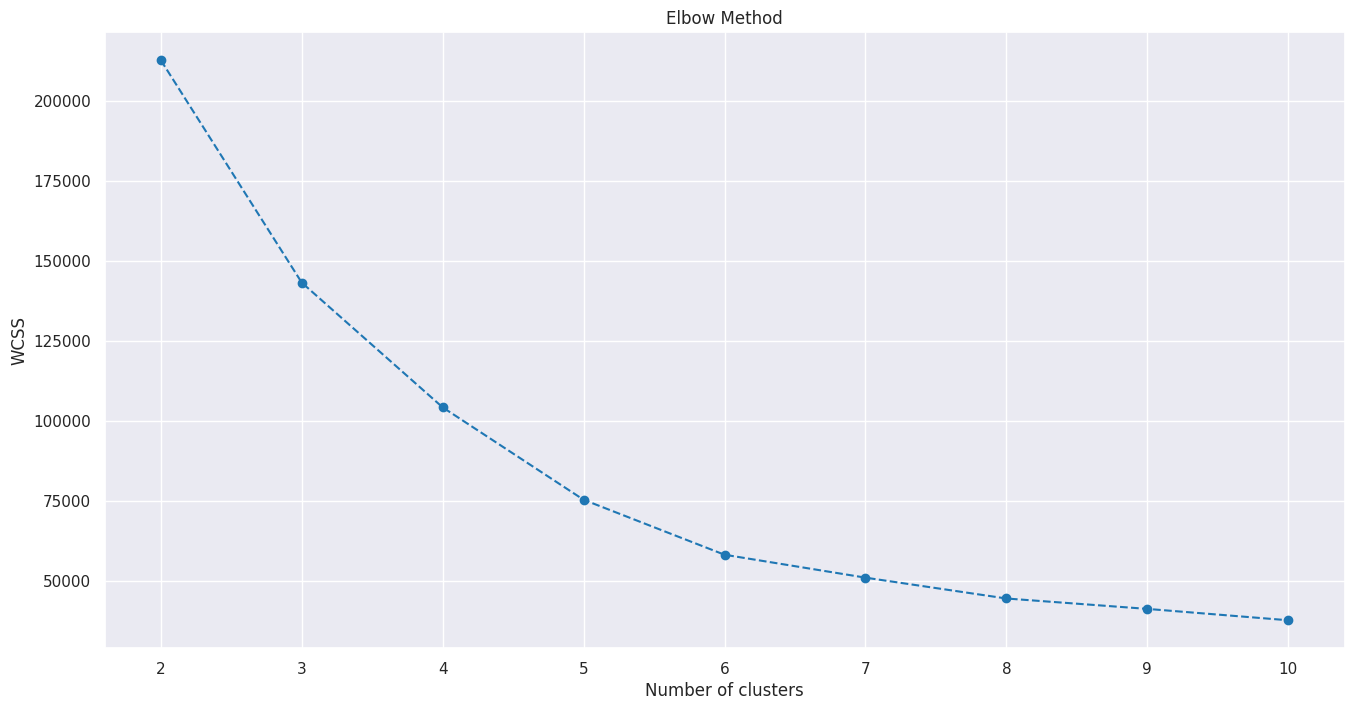

In [ ]:
# Use the elbow method to find the optimal number of clusters
wcss = []
range_n_clusters = range(2, 11)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, 
                init=grid_search.best_params_['init'], 
                max_iter=grid_search.best_params_['max_iter'], 
                tol=grid_search.best_params_['tol'], 
                algorithm=grid_search.best_params_['algorithm'], 
                random_state=42
                )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print(f'For n_clusters = {i}, the average silhouette score is : {round(silhouette_avg, 2)}')
    
plt.plot(range(2, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

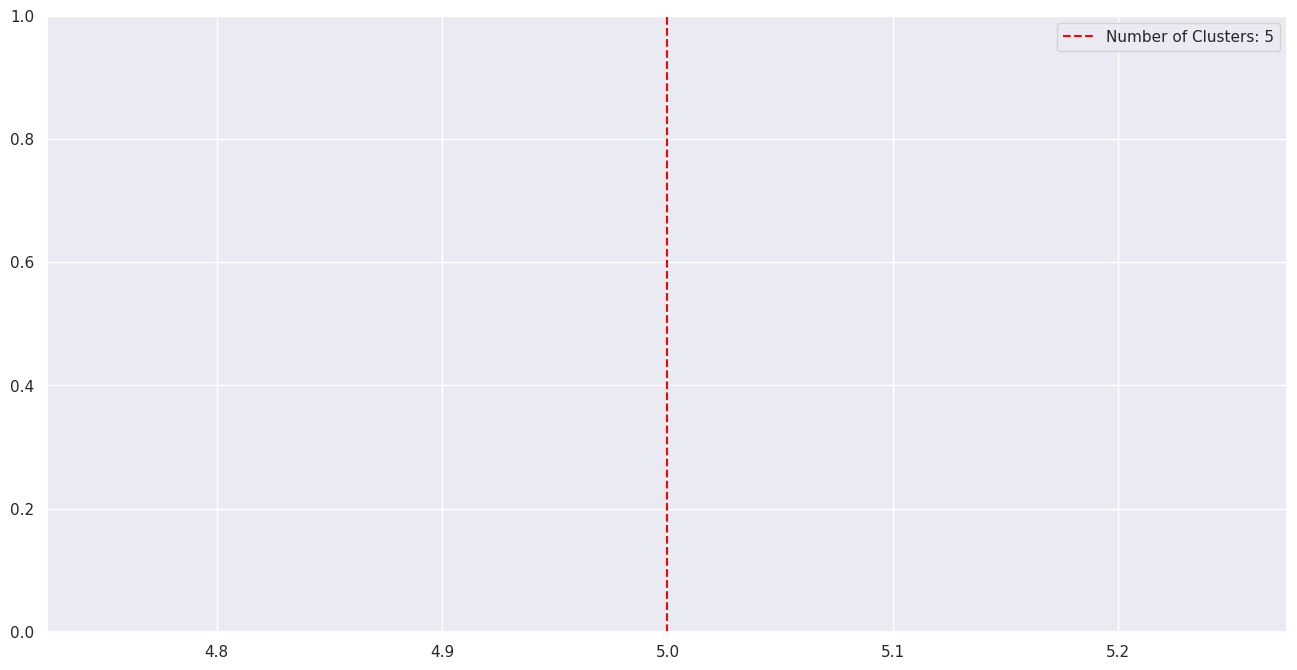

In [ ]:
# Add a vertical line indicating the number of clusters
n_clusters_g = grid_search.best_params_['n_clusters']
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Number of Clusters: {n_clusters_g}')
plt.annotate(f'Optimal Number of Clusters: {n_clusters_g}', xy=(n_clusters_g, wcss[n_clusters_g-2]), xytext=(n_clusters_g-1, wcss[n_clusters_g-2]+5000),
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)
plt.legend()
plt.show()

In [ ]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = n_clusters_g, 
                init=grid_search.best_params_['init'], 
                max_iter=grid_search.best_params_['max_iter'], 
                tol=grid_search.best_params_['tol'], 
                algorithm=grid_search.best_params_['algorithm'], 
                random_state=42
                )

In [ ]:
# We divide our data into the four clusters.
kmeans.fit(X)

KMeans(algorithm='auto', init='random', max_iter=100, n_clusters=5,
       random_state=42)

In [ ]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Segment K-means,,,
0,32.692308,86.538462,82.128205
1,24.960000,28.040000,77.000000
2,45.217391,26.304348,20.913043
3,40.324324,87.432432,18.189189
4,43.934211,55.210526,49.447368


In [ ]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans.groupby(['Segment K-means']).size()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis[['Age', 'Annual Income (k$)']]

,Age,Annual Income (k$)
Segment K-means,,
0,32.692308,86.538462
1,24.960000,28.040000
2,45.217391,26.304348
3,40.324324,87.432432
4,43.934211,55.210526


In [ ]:
df_segm_analysis.rename({0:'Young Moderate Income',
                         1:'Young Low Income',
                         2:'Middle-aged Low Income',
                         3:'Middle-aged High Income',
                         4:'Senior Moderate Income',
                         5:'Middle-aged High Income'
                        })

,Age,Annual Income (k$),Spending Score (1-100),N Obs,Prop Obs
Segment K-means,,,,,
Young Moderate Income,32.692308,86.538462,82.128205,39,0.195
Young Low Income,24.960000,28.040000,77.000000,25,0.125
Middle-aged Low Income,45.217391,26.304348,20.913043,23,0.115
Middle-aged High Income,40.324324,87.432432,18.189189,37,0.185
Senior Moderate Income,43.934211,55.210526,49.447368,76,0.380


In [ ]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Young Moderate Income',
                         1:'Young Low Income',
                         2:'Middle-aged Low Income',
                         3:'Middle-aged High Income',
                         4:'Senior Moderate Income',
                         5:'Middle-aged High Income'
                        })

In [ ]:
fig = px.scatter_3d(df_segm_kmeans, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Labels',
              symbol='Labels', opacity=0.7, size_max=10)

fig.update_layout(
    title={
        'text': "Segmentation Chart - Diego Hurtado",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

fig.show()

*	**Hierarchical Clustering**

In [ ]:
# Fit the hierarchical clustering model
agg_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
agg_cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

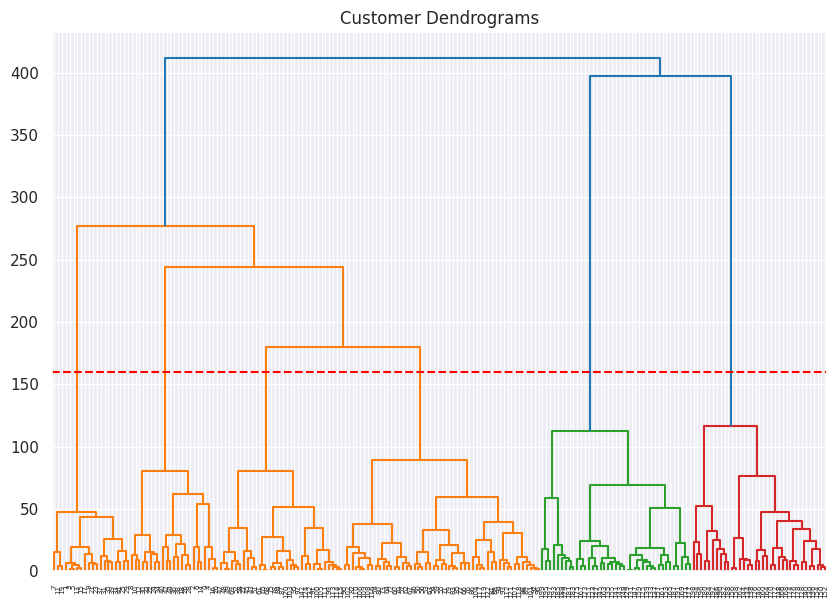

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=160, color='r', linestyle='--')
plt.show()

In [ ]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(X, method = 'ward')

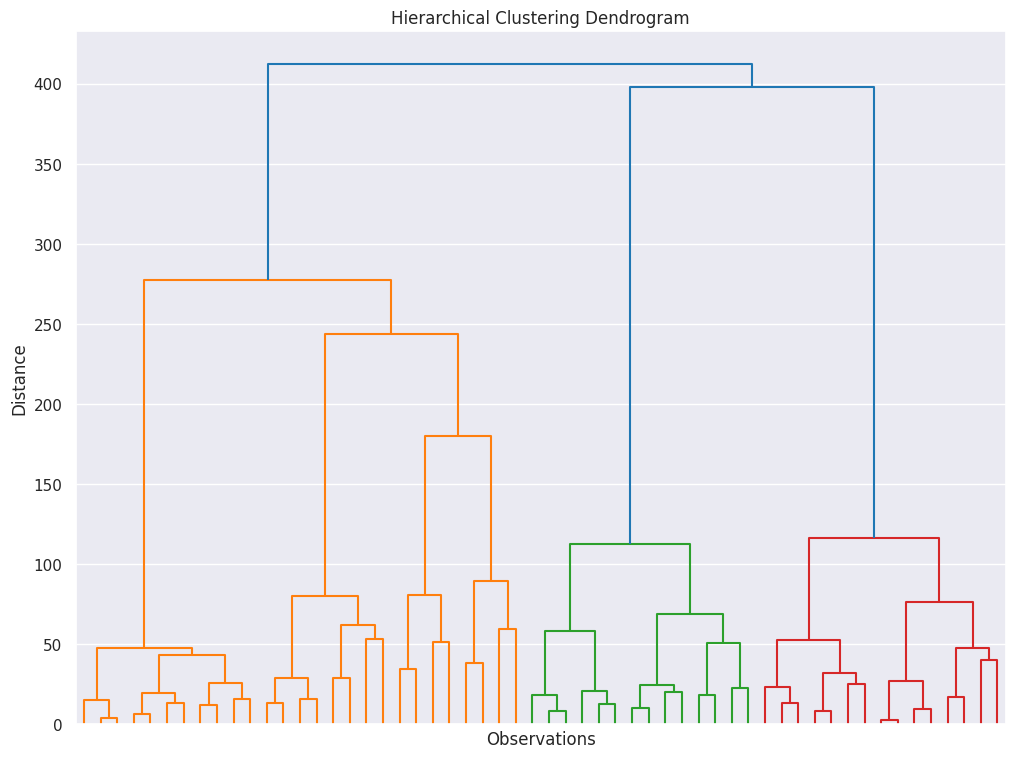

In [ ]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()